In [1]:
%cd ".."

/home/ensai/projet-statistique-2022


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics import silhouette_score


import seaborn as sns

from word_embedding.distance_wmd import *
from reduction_dim.correlation_matrix import *
import clustering.fit_clustering as CL 


# Cbow

In [3]:
#Read WMD matrix
mat_cbow_wmd = np.array(lecture_fichier_distances_wmd("distances_cbow.7z"))
#Read MDS embedding
mat_cbow_mds = np.array(pd.read_csv("data/tuning/MDS/cbow_mds_embedding.csv",sep=";",header=0))

print(f"mat_cbow_wmd shape {mat_cbow_wmd.shape}")
print(f"mat_cbow_mds shape {mat_cbow_mds.shape}")

mat_cbow_wmd shape (9501, 9501)
mat_cbow_mds shape (9501, 20)


In [4]:
mat_cbow_mds_eculidean = euclidean_distances(mat_cbow_mds)
np.fill_diagonal(mat_cbow_mds_eculidean,0)

Correlation Pearson MDS Euclidien et WMD:  0.9905765005204694
Correlation Spearman MDS Euclidien et WMD:  0.9903380686774843


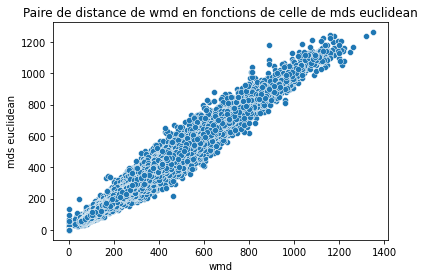

In [5]:

print("Correlation Pearson MDS Euclidien et WMD: ",correlation_epsilon(mat_cbow_wmd,mat_cbow_mds_eculidean,epsilon=np.inf))
print("Correlation Spearman MDS Euclidien et WMD: ",correlation_epsilon(mat_cbow_wmd,mat_cbow_mds_eculidean,epsilon=np.inf,type="spearman"))
flat_cbow_wmd,flat_mds_eculidean  = flat_matrix(mat_cbow_wmd),flat_matrix(mat_cbow_mds_eculidean)

sample_size = 10**6
sample_index = random.sample(range(len(flat_cbow_wmd)),sample_size)
sns.scatterplot(x=flat_cbow_wmd[sample_index],y=flat_mds_eculidean[sample_index])
plt.xlabel("wmd")
plt.ylabel("mds euclidean")
plt.title("Paire de distance de wmd en fonctions de celle de mds euclidean")
plt.show()

### Comparaison Kmedoid

In [24]:
df_kmedoides_cbow_wmd,_ = CL.selection_meilleur_kmedoides(distance=mat_cbow_wmd,init_dim=mat_cbow_mds.shape[1],ensembleK=range(2,15))
df_kmedoides_cbow_mds_euclidean,_ = CL.selection_meilleur_kmedoides(distance=mat_cbow_mds_eculidean,init_dim=mat_cbow_mds.shape[1],ensembleK=range(2,15))

Recherche optimale - K-médoïdes
0% 2% 6% 12% 16% 22% 27% 31% 37% 41% 47% 52% 56% 62% 66% 72% 77% 81% 87% 91% 97% 
 
Recherche optimale - K-médoïdes
0% 2% 6% 12% 16% 22% 27% 31% 37% 41% 47% 52% 56% 62% 66% 72% 77% 81% 87% 91% 97% 
 


In [25]:
df_kmedoides_cbow_wmd["type"] = "WMD"
df_kmedoides_cbow_mds_euclidean["type"] = "MDS"

In [29]:
df_kmedoides_cbow_mds_euclidean

,K,initialisation,val_obj,silhouette,Cal-Harabasz,DBCV,type
0,2,random,1.825980e+06,0.372341,None,-0.653560,MDS
2,2,k-medoids++,1.811901e+06,0.299970,None,-0.781497,MDS
4,3,random,1.796637e+06,0.276152,None,-0.638172,MDS
3,2,build,1.764310e+06,0.163477,None,-0.918678,MDS
6,3,k-medoids++,1.728631e+06,0.155344,None,-0.895855,MDS
10,4,k-medoids++,1.699021e+06,0.153151,None,-0.863259,MDS
8,4,random,1.720022e+06,0.106866,None,-0.864017,MDS
26,8,k-medoids++,1.632782e+06,0.095330,None,-0.794112,MDS
14,5,k-medoids++,1.669209e+06,0.084569,None,-0.813097,MDS
22,7,k-medoids++,1.651938e+06,0.065699,None,-0.832103,MDS


<AxesSubplot:title={'center':'DBCV'}, xlabel='DBCV', ylabel='Density'>

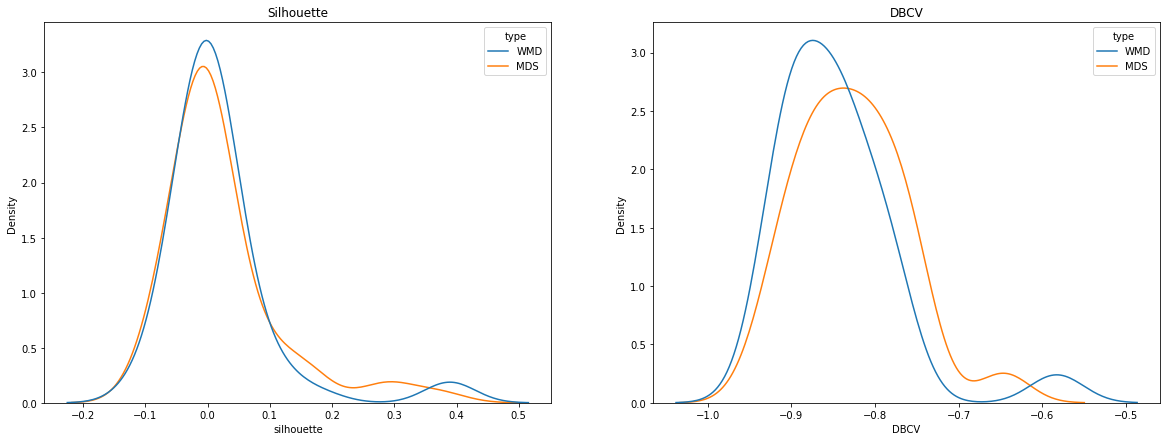

In [26]:
plt.figure(figsize = (20,7))
sns.kdeplot(data=pd.concat([df_kmedoides_cbow_wmd,df_kmedoides_cbow_mds_euclidean]).reset_index(),x="silhouette",hue="type",ax=plt.subplot(1,2,1,title="Silhouette"))
sns.kdeplot(data=pd.concat([df_kmedoides_cbow_wmd,df_kmedoides_cbow_mds_euclidean]).reset_index(),x="DBCV",hue="type",ax=plt.subplot(1,2,2,title="DBCV"))

### Comparaison HDBSCAN

In [18]:
df_hdbscan_cbow_mds_euclidean,_ = CL.selection_meilleur_hdbscan(data=mat_cbow_mds_eculidean,listeDistances="precomputed",listeMinClusterSize=range(10,15),listeVoisinage=range(2,50,5),init_dim=mat_cbow_mds.shape[1])
df_hdbscan_cbow_wmd,_ = CL.selection_meilleur_hdbscan(data=mat_cbow_wmd,listeDistances="precomputed",listeMinClusterSize=range(10,15),listeVoisinage=range(2,50,5),init_dim=mat_cbow_mds.shape[1])

Recherche optimale - HDBScan
0% 2% 6% 12% 16% 22% 26% 32% 36% 42% 46% 52% 56% 62% 66% 72% 76% 82% 86% 92% 96% 
 
Recherche optimale - HDBScan
0% 2% 6% 12% 16% 22% 26% 32% 36% 42% 46% 52% 56% 62% 66% 72% 76% 82% 86% 92% 96% 
 


In [23]:
df_hdbscan_cbow_wmd["type"] = "WMD"
df_hdbscan_cbow_mds_euclidean["type"] = "MDS"
df_hdbscan_cbow_mds_euclidean

,voisinage,min_cluster_size,distance,K,silhouette,Cal-Harabasz,DBCV,non_classes,type
5,7,10,precomputed,3,-0.103282,None,0.050028,7601,MDS
10,12,10,precomputed,3,-0.081802,None,0.048308,7346,MDS
24,22,14,precomputed,3,-0.212183,None,0.031408,8480,MDS
20,22,10,precomputed,3,-0.212183,None,0.031408,8480,MDS
22,22,12,precomputed,3,-0.212183,None,0.031408,8480,MDS
23,22,13,precomputed,3,-0.212183,None,0.031408,8480,MDS
21,22,11,precomputed,3,-0.212183,None,0.031408,8480,MDS
11,12,11,precomputed,3,-0.218665,None,0.029913,8608,MDS
12,12,12,precomputed,3,-0.218665,None,0.029913,8608,MDS
13,12,13,precomputed,3,-0.218665,None,0.029913,8608,MDS


<AxesSubplot:title={'center':'DBCV'}, xlabel='DBCV', ylabel='Density'>

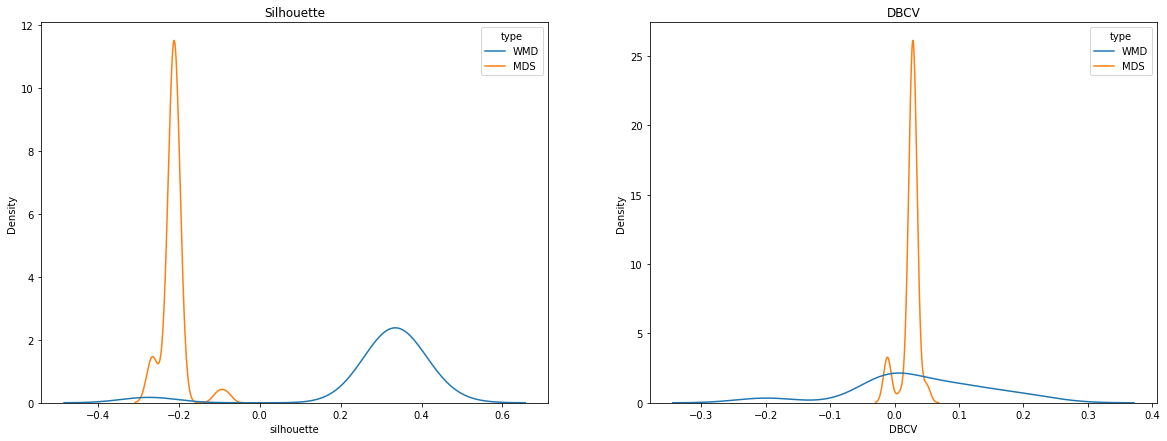

In [22]:
plt.figure(figsize = (20,7))
sns.kdeplot(data=pd.concat([df_hdbscan_cbow_wmd,df_hdbscan_cbow_mds_euclidean]).reset_index(),x="silhouette",hue="type",ax=plt.subplot(1,2,1,title="Silhouette"))
sns.kdeplot(data=pd.concat([df_hdbscan_cbow_wmd,df_hdbscan_cbow_mds_euclidean]).reset_index(),x="DBCV",hue="type",ax=plt.subplot(1,2,2,title="DBCV"))

### Comparaison DBSCAN

<AxesSubplot:ylabel='Density'>

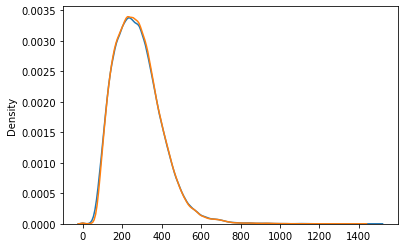

In [20]:
sns.kdeplot(flat_mds_eculidean[sample_index])
sns.kdeplot(flat_cbow_wmd[sample_index])

In [26]:
df_summary = pd.concat([pd.DataFrame(flat_cbow_wmd).describe(),pd.DataFrame(flat_mds_eculidean).describe()],axis=1)
df_summary.columns = ["WMD","MDS Euclidean Distance"]
df_summary

,WMD,MDS Euclidean Distance
count,4.513925e+07,4.513925e+07
mean,2.802918e+02,2.791056e+02
std,1.181968e+02,1.198439e+02
min,0.000000e+00,0.000000e+00
25%,1.920000e+02,1.903747e+02
50%,2.670000e+02,2.658835e+02
75%,3.490000e+02,3.492797e+02
max,1.475000e+03,1.635450e+03


In [7]:
df_dbscan_cbow_mds_euclidean,_ = CL.selection_meilleur_dbscan(data=mat_cbow_mds_eculidean,listeDistances="precomputed",listeVoisinage=range(2,15,2),listeRayons=range(20,70,5),normalizeDistance=False,init_dim=20)
df_dbscan_cbow_wmd,_ = CL.selection_meilleur_dbscan(data=mat_cbow_wmd,listeDistances="precomputed",listeVoisinage=range(2,15,2),listeRayons=range(20,70,5),normalizeDistance=False,init_dim=20)

Recherche optimale - DBScan
0% DBCV zero-size array to reduction operation minimum which has no identity
2% DBCV zero-size array to reduction operation minimum which has no identity
DBCV zero-size array to reduction operation minimum which has no identity
DBCV zero-size array to reduction operation minimum which has no identity
6% DBCV zero-size array to reduction operation minimum which has no identity
DBCV zero-size array to reduction operation minimum which has no identity
DBCV zero-size array to reduction operation minimum which has no identity
DBCV zero-size array to reduction operation minimum which has no identity
12% DBCV zero-size array to reduction operation minimum which has no identity
DBCV zero-size array to reduction operation minimum which has no identity
16% 22% DBCV zero-size array to reduction operation minimum which has no identity
26% 

/home/ensai/.local/lib/python3.8/site-packages/hdbscan/validity.py:374: RuntimeWarning: invalid value encountered in double_scalars
  (min_density_sep - density_sparseness[i]) /
/home/ensai/.local/lib/python3.8/site-packages/hdbscan/validity.py:374: RuntimeWarning: invalid value encountered in double_scalars
  (min_density_sep - density_sparseness[i]) /


32% 36% 

/home/ensai/.local/lib/python3.8/site-packages/hdbscan/validity.py:374: RuntimeWarning: invalid value encountered in double_scalars
  (min_density_sep - density_sparseness[i]) /


42% 

/home/ensai/.local/lib/python3.8/site-packages/hdbscan/validity.py:374: RuntimeWarning: invalid value encountered in double_scalars
  (min_density_sep - density_sparseness[i]) /
/home/ensai/.local/lib/python3.8/site-packages/hdbscan/validity.py:374: RuntimeWarning: invalid value encountered in double_scalars
  (min_density_sep - density_sparseness[i]) /
/home/ensai/.local/lib/python3.8/site-packages/hdbscan/validity.py:374: RuntimeWarning: invalid value encountered in double_scalars
  (min_density_sep - density_sparseness[i]) /


46% 52% 

/home/ensai/.local/lib/python3.8/site-packages/hdbscan/validity.py:374: RuntimeWarning: invalid value encountered in double_scalars
  (min_density_sep - density_sparseness[i]) /


56% 

/home/ensai/.local/lib/python3.8/site-packages/hdbscan/validity.py:374: RuntimeWarning: invalid value encountered in double_scalars
  (min_density_sep - density_sparseness[i]) /


Silhouette Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
Silhouette Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)


/home/ensai/.local/lib/python3.8/site-packages/hdbscan/validity.py:374: RuntimeWarning: invalid value encountered in double_scalars
  (min_density_sep - density_sparseness[i]) /


62% 66% 

/home/ensai/.local/lib/python3.8/site-packages/hdbscan/validity.py:374: RuntimeWarning: invalid value encountered in double_scalars
  (min_density_sep - density_sparseness[i]) /


72% Silhouette Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
Silhouette Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
Silhouette Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
76% 82% 

/home/ensai/.local/lib/python3.8/site-packages/hdbscan/validity.py:374: RuntimeWarning: invalid value encountered in double_scalars
  (min_density_sep - density_sparseness[i]) /


86% Silhouette Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
Silhouette Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
Silhouette Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
92% 96% 

/home/ensai/.local/lib/python3.8/site-packages/hdbscan/validity.py:374: RuntimeWarning: invalid value encountered in double_scalars
  (min_density_sep - density_sparseness[i]) /
/home/ensai/.local/lib/python3.8/site-packages/hdbscan/validity.py:374: RuntimeWarning: invalid value encountered in double_scalars
  (min_density_sep - density_sparseness[i]) /



 
Recherche optimale - DBScan
0% 

/home/ensai/.local/lib/python3.8/site-packages/hdbscan/validity.py:34: RuntimeWarning: divide by zero encountered in power
  result **= (-1.0 / d)


DBCV zero-size array to reduction operation minimum which has no identity
2% 

/home/ensai/.local/lib/python3.8/site-packages/hdbscan/validity.py:34: RuntimeWarning: divide by zero encountered in power
  result **= (-1.0 / d)


DBCV zero-size array to reduction operation minimum which has no identity


/home/ensai/.local/lib/python3.8/site-packages/hdbscan/validity.py:34: RuntimeWarning: divide by zero encountered in power
  result **= (-1.0 / d)


DBCV zero-size array to reduction operation minimum which has no identity


/home/ensai/.local/lib/python3.8/site-packages/hdbscan/validity.py:34: RuntimeWarning: divide by zero encountered in power
  result **= (-1.0 / d)


DBCV zero-size array to reduction operation minimum which has no identity
6% 

/home/ensai/.local/lib/python3.8/site-packages/hdbscan/validity.py:34: RuntimeWarning: divide by zero encountered in power
  result **= (-1.0 / d)


DBCV zero-size array to reduction operation minimum which has no identity


/home/ensai/.local/lib/python3.8/site-packages/hdbscan/validity.py:34: RuntimeWarning: divide by zero encountered in power
  result **= (-1.0 / d)


DBCV zero-size array to reduction operation minimum which has no identity


/home/ensai/.local/lib/python3.8/site-packages/hdbscan/validity.py:34: RuntimeWarning: divide by zero encountered in power
  result **= (-1.0 / d)


DBCV zero-size array to reduction operation minimum which has no identity


/home/ensai/.local/lib/python3.8/site-packages/hdbscan/validity.py:34: RuntimeWarning: divide by zero encountered in power
  result **= (-1.0 / d)


DBCV zero-size array to reduction operation minimum which has no identity
12% 

/home/ensai/.local/lib/python3.8/site-packages/hdbscan/validity.py:34: RuntimeWarning: divide by zero encountered in power
  result **= (-1.0 / d)


DBCV zero-size array to reduction operation minimum which has no identity


/home/ensai/.local/lib/python3.8/site-packages/hdbscan/validity.py:34: RuntimeWarning: divide by zero encountered in power
  result **= (-1.0 / d)


DBCV zero-size array to reduction operation minimum which has no identity


/home/ensai/.local/lib/python3.8/site-packages/hdbscan/validity.py:34: RuntimeWarning: divide by zero encountered in power
  result **= (-1.0 / d)
/home/ensai/.local/lib/python3.8/site-packages/hdbscan/validity.py:374: RuntimeWarning: invalid value encountered in double_scalars
  (min_density_sep - density_sparseness[i]) /


16% 

/home/ensai/.local/lib/python3.8/site-packages/hdbscan/validity.py:34: RuntimeWarning: divide by zero encountered in power
  result **= (-1.0 / d)
/home/ensai/.local/lib/python3.8/site-packages/hdbscan/validity.py:374: RuntimeWarning: invalid value encountered in double_scalars
  (min_density_sep - density_sparseness[i]) /
/home/ensai/.local/lib/python3.8/site-packages/hdbscan/validity.py:34: RuntimeWarning: divide by zero encountered in power
  result **= (-1.0 / d)
/home/ensai/.local/lib/python3.8/site-packages/hdbscan/validity.py:374: RuntimeWarning: invalid value encountered in double_scalars
  (min_density_sep - density_sparseness[i]) /
/home/ensai/.local/lib/python3.8/site-packages/hdbscan/validity.py:34: RuntimeWarning: divide by zero encountered in power
  result **= (-1.0 / d)
/home/ensai/.local/lib/python3.8/site-packages/hdbscan/validity.py:374: RuntimeWarning: invalid value encountered in double_scalars
  (min_density_sep - density_sparseness[i]) /
/home/ensai/.local/lib/py

22% 

/home/ensai/.local/lib/python3.8/site-packages/hdbscan/validity.py:34: RuntimeWarning: divide by zero encountered in power
  result **= (-1.0 / d)
/home/ensai/.local/lib/python3.8/site-packages/hdbscan/validity.py:374: RuntimeWarning: invalid value encountered in double_scalars
  (min_density_sep - density_sparseness[i]) /
/home/ensai/.local/lib/python3.8/site-packages/hdbscan/validity.py:34: RuntimeWarning: divide by zero encountered in power
  result **= (-1.0 / d)


DBCV zero-size array to reduction operation minimum which has no identity


/home/ensai/.local/lib/python3.8/site-packages/hdbscan/validity.py:34: RuntimeWarning: divide by zero encountered in power
  result **= (-1.0 / d)
/home/ensai/.local/lib/python3.8/site-packages/hdbscan/validity.py:374: RuntimeWarning: invalid value encountered in double_scalars
  (min_density_sep - density_sparseness[i]) /


26% 

/home/ensai/.local/lib/python3.8/site-packages/hdbscan/validity.py:34: RuntimeWarning: divide by zero encountered in power
  result **= (-1.0 / d)
/home/ensai/.local/lib/python3.8/site-packages/hdbscan/validity.py:374: RuntimeWarning: invalid value encountered in double_scalars
  (min_density_sep - density_sparseness[i]) /
/home/ensai/.local/lib/python3.8/site-packages/hdbscan/validity.py:34: RuntimeWarning: divide by zero encountered in power
  result **= (-1.0 / d)
/home/ensai/.local/lib/python3.8/site-packages/hdbscan/validity.py:374: RuntimeWarning: invalid value encountered in double_scalars
  (min_density_sep - density_sparseness[i]) /
/home/ensai/.local/lib/python3.8/site-packages/hdbscan/validity.py:34: RuntimeWarning: divide by zero encountered in power
  result **= (-1.0 / d)
/home/ensai/.local/lib/python3.8/site-packages/hdbscan/validity.py:374: RuntimeWarning: invalid value encountered in double_scalars
  (min_density_sep - density_sparseness[i]) /
/home/ensai/.local/lib/py

32% 

/home/ensai/.local/lib/python3.8/site-packages/hdbscan/validity.py:34: RuntimeWarning: divide by zero encountered in power
  result **= (-1.0 / d)
/home/ensai/.local/lib/python3.8/site-packages/hdbscan/validity.py:374: RuntimeWarning: invalid value encountered in double_scalars
  (min_density_sep - density_sparseness[i]) /
/home/ensai/.local/lib/python3.8/site-packages/hdbscan/validity.py:34: RuntimeWarning: divide by zero encountered in power
  result **= (-1.0 / d)
/home/ensai/.local/lib/python3.8/site-packages/hdbscan/validity.py:374: RuntimeWarning: invalid value encountered in double_scalars
  (min_density_sep - density_sparseness[i]) /
/home/ensai/.local/lib/python3.8/site-packages/hdbscan/validity.py:34: RuntimeWarning: divide by zero encountered in power
  result **= (-1.0 / d)
/home/ensai/.local/lib/python3.8/site-packages/hdbscan/validity.py:374: RuntimeWarning: invalid value encountered in double_scalars
  (min_density_sep - density_sparseness[i]) /


36% 

/home/ensai/.local/lib/python3.8/site-packages/hdbscan/validity.py:34: RuntimeWarning: divide by zero encountered in power
  result **= (-1.0 / d)
/home/ensai/.local/lib/python3.8/site-packages/hdbscan/validity.py:374: RuntimeWarning: invalid value encountered in double_scalars
  (min_density_sep - density_sparseness[i]) /
/home/ensai/.local/lib/python3.8/site-packages/hdbscan/validity.py:34: RuntimeWarning: divide by zero encountered in power
  result **= (-1.0 / d)
/home/ensai/.local/lib/python3.8/site-packages/hdbscan/validity.py:374: RuntimeWarning: invalid value encountered in double_scalars
  (min_density_sep - density_sparseness[i]) /
/home/ensai/.local/lib/python3.8/site-packages/hdbscan/validity.py:34: RuntimeWarning: divide by zero encountered in power
  result **= (-1.0 / d)
/home/ensai/.local/lib/python3.8/site-packages/hdbscan/validity.py:374: RuntimeWarning: invalid value encountered in double_scalars
  (min_density_sep - density_sparseness[i]) /
/home/ensai/.local/lib/py

42% 

/home/ensai/.local/lib/python3.8/site-packages/hdbscan/validity.py:34: RuntimeWarning: divide by zero encountered in power
  result **= (-1.0 / d)
/home/ensai/.local/lib/python3.8/site-packages/hdbscan/validity.py:374: RuntimeWarning: invalid value encountered in double_scalars
  (min_density_sep - density_sparseness[i]) /
/home/ensai/.local/lib/python3.8/site-packages/hdbscan/validity.py:34: RuntimeWarning: divide by zero encountered in power
  result **= (-1.0 / d)
/home/ensai/.local/lib/python3.8/site-packages/hdbscan/validity.py:374: RuntimeWarning: invalid value encountered in double_scalars
  (min_density_sep - density_sparseness[i]) /
/home/ensai/.local/lib/python3.8/site-packages/hdbscan/validity.py:34: RuntimeWarning: divide by zero encountered in power
  result **= (-1.0 / d)
/home/ensai/.local/lib/python3.8/site-packages/hdbscan/validity.py:374: RuntimeWarning: invalid value encountered in double_scalars
  (min_density_sep - density_sparseness[i]) /


46% 52% 56% Silhouette Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
Silhouette Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)


/home/ensai/.local/lib/python3.8/site-packages/hdbscan/validity.py:374: RuntimeWarning: invalid value encountered in double_scalars
  (min_density_sep - density_sparseness[i]) /


62% 66% 

/home/ensai/.local/lib/python3.8/site-packages/hdbscan/validity.py:33: RuntimeWarning: invalid value encountered in true_divide
  result /= distance_matrix.shape[0] - 1


DBCV zero-size array to reduction operation maximum which has no identity
72% Silhouette Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
Silhouette Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)


/home/ensai/.local/lib/python3.8/site-packages/hdbscan/validity.py:374: RuntimeWarning: invalid value encountered in double_scalars
  (min_density_sep - density_sparseness[i]) /


76% 

/home/ensai/.local/lib/python3.8/site-packages/hdbscan/validity.py:374: RuntimeWarning: invalid value encountered in double_scalars
  (min_density_sep - density_sparseness[i]) /


82% 86% Silhouette Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
Silhouette Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
Silhouette Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
Silhouette Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
92% 96% 
 


In [10]:
df_dbscan_cbow_wmd["type"] = "WMD"
df_dbscan_cbow_mds_euclidean["type"] = "MDS"
df_dbscan_cbow_mds_euclidean

,voisinage,rayon,distance,K,silhouette,Cal-Harabasz,DBCV,non_classes,type
65,14,45,precomputed,3,-0.207967,None,0.035397,8532,MDS
55,12,45,precomputed,3,-0.205078,None,0.029531,8497,MDS
45,10,45,precomputed,4,-0.240947,None,0.02722,8444,MDS
24,6,40,precomputed,5,-0.252295,None,0.018119,8780,MDS
36,8,50,precomputed,3,-0.163968,None,0.015209,7979,MDS
...,...,...,...,...,...,...,...,...,...
42,10,30,precomputed,2,-0.276764,None,NaN,9491,MDS
47,10,55,precomputed,2,-0.090952,None,NaN,7627,MDS
57,12,55,precomputed,2,-0.092658,None,NaN,7647,MDS
67,14,55,precomputed,2,-0.093814,None,NaN,7660,MDS


In [14]:
pd.concat([df_dbscan_cbow_wmd,df_dbscan_cbow_mds_euclidean]).dropna(subset="silhouette")

,voisinage,rayon,distance,K,silhouette,Cal-Harabasz,DBCV,non_classes,type
67,14,55,precomputed,4,-0.197958,None,0.043711,8463,WMD
66,14,50,precomputed,3,-0.236405,None,0.028242,8912,WMD
46,10,50,precomputed,5,-0.246813,None,0.021438,8769,WMD
33,8,35,precomputed,6,-0.321287,None,0.003786,9438,WMD
34,8,40,precomputed,12,-0.345314,None,0.002777,9323,WMD
...,...,...,...,...,...,...,...,...,...
42,10,30,precomputed,2,-0.276764,None,NaN,9491,MDS
47,10,55,precomputed,2,-0.090952,None,NaN,7627,MDS
57,12,55,precomputed,2,-0.092658,None,NaN,7647,MDS
67,14,55,precomputed,2,-0.093814,None,NaN,7660,MDS


<AxesSubplot:title={'center':'DBCV'}, xlabel='DBCV', ylabel='Density'>

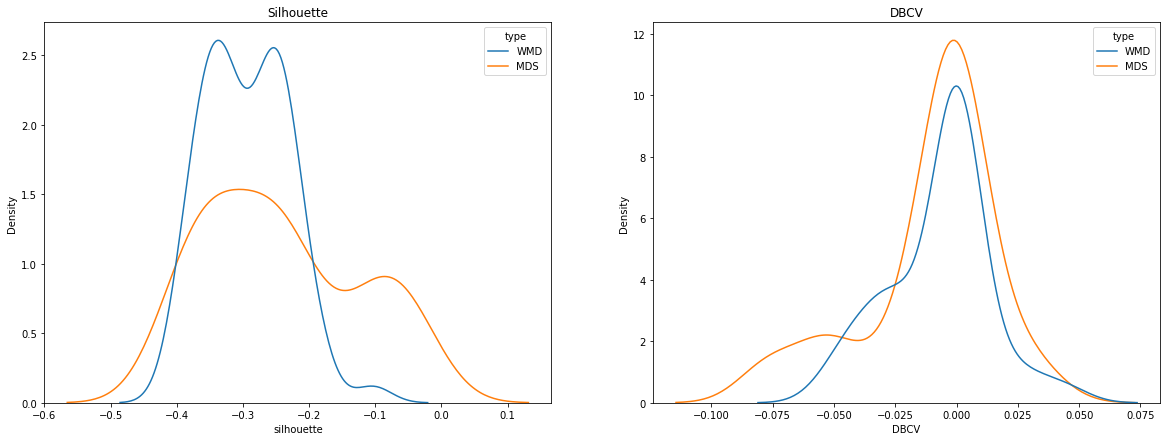

In [16]:
plt.figure(figsize = (20,7))
sns.kdeplot(data=pd.concat([df_dbscan_cbow_wmd,df_dbscan_cbow_mds_euclidean]).dropna(subset="silhouette").reset_index(),x="silhouette",hue="type",ax=plt.subplot(1,2,1,title="Silhouette"))
sns.kdeplot(data=pd.concat([df_dbscan_cbow_wmd,df_dbscan_cbow_mds_euclidean]).dropna(subset="DBCV").reset_index(),x="DBCV",hue="type",ax=plt.subplot(1,2,2,title="DBCV"))